In [ ]:
"""import kagglehub

# Download latest version
path = kagglehub.dataset_download("onurkarasoy/turkish-sms-collection")

print("Path to dataset files:", path)"""

c:\Users\Kanki\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Kanki\.cache\kagglehub\datasets\onurkarasoy\turkish-sms-collection\versions\1


In [60]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv(r"dataset\TurkishSmsCollection.csv",sep=";")

In [77]:
df.head(20)

,Message,Group,GroupText
0,125 lira,2,Normal
1,Baskanin aksam toplantısi fenaymis :),2,Normal
2,Bilal yalçnlara ne zaman gidiyoruz?,2,Normal
3,"BiP ile mesajlarimi aninda, daha eglenceli gon...",1,Spam
4,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR...,1,Spam
5,İyi ya dokuz eylül iyidir arş.gör falan kovala ;),2,Normal
6,İyiyim teşekkürler oturuyoruz nazarda arkadaşl...,2,Normal
7,Kapatamıyorun ayarlara girmem lazım :),2,Normal
8,Menüye girsem görünür mü acaba ??,2,Normal
9,Önemli değil hocam iyi akşamlar ;),2,Normal


In [78]:
df["Message"] = df["Message"].str.lower()

In [79]:
df["Message"] = df["Message"].apply(lambda x: re.sub(r'[^a-zA-ZğüşöçİĞÜŞÖÇ0-9 ]', ' ', x))

In [80]:
df["Group"] = df["Group"].replace(1,0)
df["Group"] = df["Group"].replace(2,1)

In [84]:
df.rename(columns={"Group":"Label"},inplace=True)

In [85]:
df.head(20)

,Message,Label,GroupText
0,125 lira,1,Normal
1,baskanin aksam toplant si fenaymis,1,Normal
2,bilal yalçnlara ne zaman gidiyoruz,1,Normal
3,bip ile mesajlarimi aninda daha eglenceli gon...,0,Spam
4,digiturkten firsat size ozel yil sonuna kadar...,0,Spam
5,i yi ya dokuz eylül iyidir arş gör falan koval...,1,Normal
6,i yiyim teşekkürler oturuyoruz nazarda arkadaş...,1,Normal
7,kapatam yorun ayarlara girmem laz m,1,Normal
8,menüye girsem görünür mü acaba,1,Normal
9,önemli değil hocam iyi akşamlar,1,Normal


In [ ]:
"""import nltk
nltk.download("stopwords")"""

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kanki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [86]:
from nltk.corpus import stopwords

In [87]:
turkish_stopwords = set(stopwords.words("turkish"))
df["Message"] = df["Message"].apply(lambda x: " ".join([word for word in x.split() if word not in turkish_stopwords]))

In [88]:
df["Message"][17]

'100 pamuk penye percale saten carsaf carsaf takimlarinda 50 50 indirim 02 agustos son sms iptal 5830 a mc mersis 0273065777400019 madamecoco com'

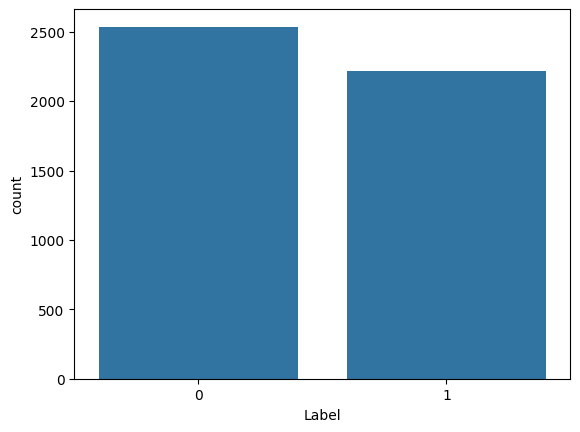

In [90]:
sns.countplot(x=df['Label'])
plt.show()

In [95]:
length_of_the_messages = df["Message"].str.split("\\s+")
print(length_of_the_messages.str.len().max())

59


In [105]:
# Finding Total no of unique words in corpus
s = set()
for sent in df['Message']:
  for word in sent.split():
    s.add(word)
total_words_length=len(s)
print(total_words_length)

13212


In [97]:
from sklearn.model_selection import train_test_split

In [109]:
X , y = np.asanyarray(df["Message"]), np.asanyarray(df["Label"])
new_df = pd.DataFrame({"Text": X,"label": y})
X_train,X_test,y_train,y_test = train_test_split(new_df["Text"],new_df["label"],test_size=0.2,random_state=42)
X_train.shape , y_train.shape , X_test.shape, y_test.shape

((3800,), (3800,), (951,), (951,))